In [1]:
import numpy as np

import array, random, time, copy
from deap import base, creator, benchmarks, tools, algorithms
import time

from matplotlib import cm
import matplotlib.pyplot as plt

random.seed(42)

In [2]:
import seaborn as sns

sns.set(style='whitegrid')
sns.set_context('notebook')

$$\text{Esfera:  } f(\mathbf{x}) = \sum_{i=0}^{N-1}x_i^2 $$

In [3]:
current_problem = benchmarks.sphere

# Tamanho de indivuduo

## Size = 10

In [4]:
ind_size = 10

MIN_VALUE, MAX_VALUE = -100., 100.
MIN_STRAT, MAX_STRAT = 0.0000001, 1. 

In [5]:
# We are facing a minimization problem
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Evolutionary strategies need a location (mean)
creator.create("Individual", array.array, typecode='d', 
               fitness=creator.FitnessMin, strategy=None)

# ...and a value of the strategy parameter.
creator.create("Strategy", array.array, typecode="d")

In [6]:
def init_univariate_es_ind(individual_class, strategy_class,
                           size, min_value, max_value, 
                           min_strat, max_strat):
    ind = individual_class(random.uniform(min_value, max_value) 
                           for _ in range(size))
    # we modify the instance to include the strategy in run-time.
    ind.strategy = strategy_class(random.uniform(min_strat, max_strat) for _ in range(size))
    return ind

In [7]:
toolbox = base.Toolbox() 

toolbox.register("individual", 
                 init_univariate_es_ind, 
                 creator.Individual, 
                 creator.Strategy,
                 ind_size, 
                 MIN_VALUE,
                 MAX_VALUE, 
                 MIN_STRAT, 
                 MAX_STRAT)

toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

In [9]:
toolbox.register("mutate", tools.mutESLogNormal, c=1, indpb=0.1)
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("evaluate", current_problem)
toolbox.register("select", tools.selBest)

In [31]:
ind = toolbox.individual()
pop = toolbox.population(n=1)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max, axis=0)


In [39]:
pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=1, 
                                         lambda_=1, cxpb=.6,
                                         mutpb=.3, ngen=1000, 
                                         stats=stats, 
                                         halloffame=hof, verbose=False)

In [40]:
best=logbook.select("max")
gen=logbook.select("gen")

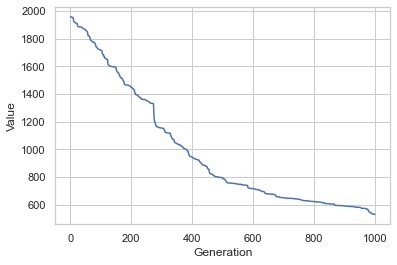

In [41]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, best, label="value")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Value")

labs = ['value', 'Average']

plt.show()

## Size = 25

In [43]:
ind_size = 25
n_pop=2
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='d', 
               fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

toolbox = base.Toolbox() 
toolbox.register("individual", init_univariate_es_ind, 
                 creator.Individual, 
                 creator.Strategy,
                 ind_size, 
                 MIN_VALUE, MAX_VALUE, 
                 MIN_STRAT, MAX_STRAT)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mutate", tools.mutESLogNormal, c=1, indpb=0.1)
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("evaluate", current_problem)
toolbox.register("select", tools.selBest)

ind = toolbox.individual()
pop = toolbox.population(n=n_pop)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max, axis=0)
stats.register("min", np.min, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=n_pop, 
                                         lambda_=n_pop, cxpb=.6,
                                         mutpb=.3, ngen=1000, 
                                         stats=stats, 
                                         halloffame=hof,
                                         #verbose=False, 
                                         verbose=True
                                        )

gen	nevals	max             	min             
0  	10    	[98940.65512703]	[53457.40075147]
1  	9     	[76962.87310339]	[43424.94642079]
2  	6     	[56674.04730175]	[37681.97146318]
3  	6     	[43407.19775864]	[24507.33609417]
4  	10    	[37885.20980194]	[24497.42842728]
5  	8     	[28607.91170191]	[24497.42842728]
6  	9     	[25034.71470716]	[20568.37683578]
7  	10    	[24507.33609417]	[19355.44849196]
8  	7     	[22327.47732572]	[19355.44849196]
9  	9     	[20554.84291676]	[19355.44849196]
10 	9     	[19760.76108022]	[19196.38906203]
11 	8     	[19410.29754824]	[17661.17275598]
12 	6     	[19327.45056804]	[17635.78890983]
13 	10    	[18128.6392356] 	[16764.36098534]
14 	10    	[17661.17275598]	[16764.36098534]
15 	8     	[17191.9370546] 	[16364.64214043]
16 	9     	[16872.87177398]	[16176.92463126]
17 	9     	[16764.36098534]	[16176.92463126]
18 	10    	[16437.42644416]	[16176.92463126]
19 	9     	[16359.93087161]	[15906.59488164]
20 	8     	[16337.97378566]	[15906.59488164]
21 	10    

275	8     	[8513.93368328] 	[8430.16794134] 
276	10    	[8456.45203654] 	[8374.17585428] 
277	9     	[8452.16363571] 	[8374.17585428] 
278	9     	[8427.42906255] 	[8354.97971886] 
279	10    	[8400.24968961] 	[8336.07942096] 
280	8     	[8380.16032835] 	[8334.62036197] 
281	8     	[8368.98136238] 	[8318.58112902] 
282	9     	[8339.33148688] 	[8318.58112902] 
283	10    	[8329.64597869] 	[8294.79727239] 
284	9     	[8319.53313588] 	[8220.89458635] 
285	9     	[8277.71365183] 	[8206.19773493] 
286	10    	[8234.7840757]  	[8190.08298091] 
287	8     	[8209.97542111] 	[8181.4653639]  
288	9     	[8190.08298091] 	[8013.20033032] 
289	8     	[8156.55323284] 	[7972.04094379] 
290	9     	[8121.91650059] 	[7937.63551326] 
291	10    	[8072.31413892] 	[7905.20486492] 
292	9     	[7972.04094379] 	[7879.58640947] 
293	8     	[7937.63551326] 	[7879.58640947] 
294	9     	[7905.27637608] 	[7857.43023978] 
295	7     	[7895.46944706] 	[7851.93254332] 
296	9     	[7879.58640947] 	[7851.93254332] 
297	10    

525	9     	[5193.84450339] 	[5128.23820537] 
526	10    	[5185.90251545] 	[5116.49213015] 
527	9     	[5165.49165205] 	[5116.49213015] 
528	10    	[5130.4020358]  	[5072.94737953] 
529	9     	[5118.77007834] 	[5072.94737953] 
530	7     	[5103.57803784] 	[5024.36712064] 
531	8     	[5099.16032567] 	[5024.36712064] 
532	10    	[5083.97814015] 	[5024.36712064] 
533	10    	[5058.97051138] 	[5021.49808333] 
534	9     	[5041.25439309] 	[5018.20855661] 
535	10    	[5037.14325751] 	[5017.54837228] 
536	9     	[5024.36712064] 	[5015.69589559] 
537	8     	[5020.70482162] 	[5013.16672233] 
538	9     	[5017.8917123]  	[5003.18147625] 
539	8     	[5017.12815879] 	[4991.67519852] 
540	8     	[5013.97335613] 	[4969.22364097] 
541	7     	[5007.77318748] 	[4969.22364097] 
542	10    	[4996.12777108] 	[4969.22364097] 
543	9     	[4990.74499237] 	[4969.22364097] 
544	10    	[4984.40563213] 	[4965.89549028] 
545	9     	[4979.86323514] 	[4964.51351757] 
546	8     	[4970.98935824] 	[4964.51351757] 
547	10    

771	9     	[3501.52708997] 	[3498.30977033] 
772	9     	[3500.01762068] 	[3498.19478711] 
773	10    	[3498.86947452] 	[3490.28837306] 
774	10    	[3498.30977033] 	[3488.7028021]  
775	8     	[3497.14390786] 	[3471.506589]   
776	9     	[3490.28837306] 	[3469.50956416] 
777	9     	[3486.34682207] 	[3469.50956416] 
778	9     	[3478.77760407] 	[3461.36327395] 
779	9     	[3471.506589]   	[3461.36327395] 
780	9     	[3468.83137892] 	[3459.40106572] 
781	8     	[3464.54250057] 	[3459.40106572] 
782	9     	[3460.66246829] 	[3454.51127387] 
783	9     	[3459.40106572] 	[3400.88307089] 
784	10    	[3456.82041204] 	[3400.88307089] 
785	8     	[3454.51127387] 	[3380.68563349] 
786	7     	[3446.57102046] 	[3378.64261746] 
787	10    	[3414.06698824] 	[3378.64261746] 
788	9     	[3389.78645178] 	[3373.98743896] 
789	10    	[3380.68563349] 	[3358.07887515] 
790	9     	[3378.66434463] 	[3311.08707862] 
791	9     	[3373.98743896] 	[3311.08707862] 
792	9     	[3371.04035307] 	[3311.08707862] 
793	8     

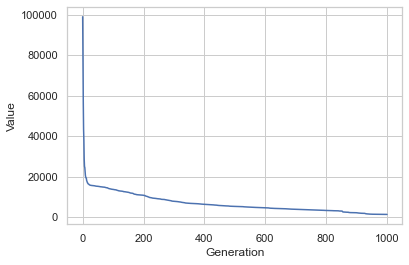

In [44]:
best=logbook.select("max")
gen=logbook.select("gen")

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, best, label="value")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Value")

labs = ['value', 'Average']

plt.show()

## Size = 50

In [45]:
ind_size = 50
n_pop=2
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='d', 
               fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

toolbox = base.Toolbox() 
toolbox.register("individual", init_univariate_es_ind, 
                 creator.Individual, 
                 creator.Strategy,
                 ind_size, 
                 MIN_VALUE, MAX_VALUE, 
                 MIN_STRAT, MAX_STRAT)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mutate", tools.mutESLogNormal, c=1, indpb=0.1)
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("evaluate", current_problem)
toolbox.register("select", tools.selBest)

ind = toolbox.individual()
pop = toolbox.population(n=n_pop)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max, axis=0)
stats.register("min", np.min, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=n_pop, 
                                         lambda_=n_pop, cxpb=.6,
                                         mutpb=.3, ngen=1000, 
                                         stats=stats, 
                                         halloffame=hof,
                                         #verbose=False, 
                                         verbose=True
                                        )

gen	nevals	max              	min              
0  	10    	[187785.13125201]	[131941.29244606]
1  	10    	[165028.75413834]	[94381.21845926] 
2  	9     	[114509.05105063]	[87421.1531238]  
3  	9     	[98411.29636232] 	[58725.73514178] 
4  	10    	[78739.63004681] 	[54210.70808905] 
5  	10    	[64405.8209791]  	[48550.67571059] 
6  	9     	[54228.02159341] 	[42099.10120821] 
7  	10    	[47930.4813653]  	[39640.36594161] 
8  	9     	[42925.68537799] 	[39640.36594161] 
9  	10    	[40287.42787797] 	[38150.88974449] 
10 	9     	[38973.88519883] 	[36563.96965523] 
11 	10    	[37811.46764377] 	[35898.89757312] 
12 	10    	[36569.55900554] 	[35717.40717217] 
13 	10    	[36473.6378633]  	[35717.40717217] 
14 	8     	[35927.08192616] 	[35403.63292027] 
15 	7     	[35865.79527767] 	[35403.63292027] 
16 	9     	[35757.659662]   	[35403.63292027] 
17 	8     	[35696.04643166] 	[35403.63292027] 
18 	8     	[35631.21149438] 	[35403.63292027] 
19 	8     	[35554.85002006] 	[35403.63292027] 
20 	9     	[3

191	10    	[29262.00457222] 	[29077.45357129] 
192	10    	[29226.85580767] 	[29077.45357129] 
193	8     	[29189.60023353] 	[28889.60359933] 
194	9     	[29123.22328664] 	[28889.60359933] 
195	9     	[29081.60077724] 	[28889.60359933] 
196	10    	[29040.75062483] 	[28831.5102757]  
197	7     	[28999.43837499] 	[28831.5102757]  
198	10    	[28941.69958168] 	[28831.5102757]  
199	7     	[28859.43695517] 	[28732.50941737] 
200	7     	[28831.5102757]  	[28718.24514471] 
201	10    	[28771.61104343] 	[28713.48259294] 
202	7     	[28732.50941737] 	[28659.79189976] 
203	10    	[28720.2551633]  	[28659.79189976] 
204	10    	[28703.86779942] 	[28582.33585714] 
205	10    	[28681.47565437] 	[28565.97712945] 
206	9     	[28626.98757109] 	[28542.3640989]  
207	7     	[28582.33585714] 	[28507.82718609] 
208	10    	[28547.02148096] 	[28411.1827199]  
209	8     	[28536.88819164] 	[28411.1827199]  
210	10    	[28493.34326837] 	[28411.1827199]  
211	9     	[28485.89625792] 	[28411.1827199]  
212	9     	[2

387	10    	[21732.60774784] 	[21616.60886578] 
388	8     	[21689.32498967] 	[21578.25047963] 
389	8     	[21652.38094948] 	[21472.2179239]  
390	9     	[21620.5966092]  	[21472.2179239]  
391	9     	[21585.72254505] 	[21472.2179239]  
392	9     	[21564.47444191] 	[21472.2179239]  
393	10    	[21499.86818503] 	[21315.13079114] 
394	9     	[21474.74349161] 	[21315.13079114] 
395	9     	[21449.92728474] 	[21228.6867036]  
396	8     	[21426.41680271] 	[21228.6867036]  
397	10    	[21400.11193262] 	[21228.6867036]  
398	8     	[21352.94750868] 	[21228.6867036]  
399	8     	[21315.13079114] 	[21217.47938711] 
400	7     	[21274.09854792] 	[21217.47938711] 
401	8     	[21245.11138797] 	[21217.47938711] 
402	10    	[21229.82725396] 	[21046.7677472]  
403	10    	[21228.57235568] 	[21046.7677472]  
404	10    	[21217.47938711] 	[21046.7677472]  
405	10    	[21199.06168142] 	[20957.47438836] 
406	9     	[21107.48862612] 	[20957.47438836] 
407	10    	[21018.02858934] 	[20937.51134551] 
408	10    	[2

573	10    	[16487.68552238] 	[16454.03605723] 
574	10    	[16471.78116236] 	[16341.92255778] 
575	9     	[16456.33668119] 	[16341.92255778] 
576	8     	[16419.59786779] 	[16316.388245]   
577	9     	[16374.30600419] 	[16226.07904791] 
578	7     	[16348.70741465] 	[16226.07904791] 
579	10    	[16329.66762074] 	[16221.06633157] 
580	10    	[16295.67150983] 	[16188.16756842] 
581	9     	[16262.27019401] 	[16188.16756842] 
582	10    	[16213.93454223] 	[16126.27580165] 
583	7     	[16188.16756842] 	[16111.30967365] 
584	10    	[16145.2585472]  	[16103.78769338] 
585	9     	[16128.43221515] 	[16083.85171599] 
586	9     	[16104.70379483] 	[16072.42323505] 
587	10    	[16095.00307998] 	[16019.22985704] 
588	10    	[16082.83209145] 	[16011.42866523] 
589	9     	[16066.62958742] 	[15880.76801193] 
590	9     	[16023.81150922] 	[15858.03969777] 
591	10    	[16005.45749807] 	[15845.51728128] 
592	9     	[15899.6491416]  	[15845.51728128] 
593	9     	[15880.76801193] 	[15827.87370689] 
594	8     	[1

760	7     	[12301.99003304] 	[12217.18911002] 
761	9     	[12274.44086831] 	[12202.02131779] 
762	8     	[12265.24675029] 	[12202.02131779] 
763	8     	[12258.86370909] 	[12202.02131779] 
764	9     	[12236.69979677] 	[12175.47265554] 
765	8     	[12203.88729664] 	[12173.72547439] 
766	9     	[12194.82264677] 	[12147.3484261]  
767	10    	[12175.47265554] 	[12125.29644952] 
768	9     	[12159.66575491] 	[12123.85300864] 
769	10    	[12140.88010976] 	[12103.29595638] 
770	6     	[12130.59384488] 	[12101.72445392] 
771	10    	[12108.90743784] 	[11917.13513135] 
772	10    	[12101.03051429] 	[11917.13513135] 
773	9     	[12085.6983985]  	[11917.13513135] 
774	9     	[12028.54516837] 	[11909.27493524] 
775	10    	[11965.08254883] 	[11909.27493524] 
776	10    	[11918.51555081] 	[11903.60296486] 
777	10    	[11917.27749271] 	[11889.21064968] 
778	10    	[11909.48213432] 	[11801.46095971] 
779	8     	[11900.37959323] 	[11801.46095971] 
780	9     	[11864.64078844] 	[11801.46095971] 
781	10    	[1

938	8     	[8467.72272878]  	[8375.26141195]  
939	9     	[8452.58170717]  	[8361.36558321]  
940	9     	[8442.08476837]  	[8325.69178546]  
941	9     	[8373.08007192]  	[8268.70698352]  
942	7     	[8361.36558321]  	[8268.70698352]  
943	9     	[8340.47701644]  	[8259.8176992]   
944	10    	[8301.54132774]  	[8188.95240245]  
945	10    	[8298.54401074]  	[8185.38535677]  
946	10    	[8265.98537603]  	[8185.38535677]  
947	10    	[8231.98523314]  	[8008.36235297]  
948	9     	[8201.41119399]  	[8008.36235297]  
949	9     	[8196.72010426]  	[8008.36235297]  
950	10    	[8185.38535677]  	[8008.36235297]  
951	10    	[8103.01622581]  	[7989.82365192]  
952	10    	[8038.1899021]   	[7989.82365192]  
953	9     	[8017.7957793]   	[7989.82365192]  
954	9     	[8006.31100902]  	[7989.82365192]  
955	9     	[8001.52739459]  	[7989.82365192]  
956	9     	[7994.58973258]  	[7982.50820769]  
957	10    	[7993.09979029]  	[7982.50820769]  
958	9     	[7988.65708881]  	[7982.323561]    
959	9     	[7

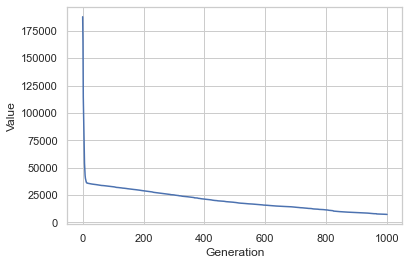

In [46]:
best=logbook.select("max")
gen=logbook.select("gen")

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, best, label="value")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Value")

labs = ['value', 'Average']

plt.show()

## Size = 100

In [47]:
ind_size = 100

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='d', 
               fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

toolbox = base.Toolbox() 
toolbox.register("individual", init_univariate_es_ind, 
                 creator.Individual, 
                 creator.Strategy,
                 ind_size, 
                 MIN_VALUE, MAX_VALUE, 
                 MIN_STRAT, MAX_STRAT)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mutate", tools.mutESLogNormal, c=1, indpb=0.1)
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("evaluate", current_problem)
toolbox.register("select", tools.selBest)

ind = toolbox.individual()
pop = toolbox.population(n=10)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max, axis=0)
stats.register("min", np.min, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=10, 
                                         lambda_=10, cxpb=.6,
                                         mutpb=.3, ngen=1000, 
                                         stats=stats, 
                                         halloffame=hof,
                                         #verbose=False, 
                                         verbose=True
                                        )

gen	nevals	max            	min              
0  	10    	[398706.158267]	[289093.19423518]
1  	9     	[358678.67759268]	[247321.4172369] 
2  	9     	[289093.19423518]	[202746.77500721]
3  	10    	[224793.12847874]	[164294.61834063]
4  	10    	[195738.84624053]	[123534.04268703]
5  	10    	[152855.93698971]	[110386.7561772] 
6  	10    	[127274.31985478]	[110386.7561772] 
7  	10    	[114683.64103451]	[101126.77808804]
8  	9     	[110677.07639074]	[100318.37812052]
9  	9     	[104898.69727308]	[94013.16655762] 
10 	10    	[100318.37812052]	[94013.16655762] 
11 	10    	[94560.99707724] 	[90183.38675803] 
12 	9     	[93968.87107758] 	[90183.38675803] 
13 	9     	[92153.31233326] 	[90183.38675803] 
14 	8     	[90614.55642953] 	[88893.91436394] 
15 	7     	[90183.38675803] 	[88710.32344147] 
16 	8     	[89417.89193136] 	[88607.57624449] 
17 	9     	[88855.64536108] 	[88606.47675398] 
18 	9     	[88812.21333462] 	[87774.23865283] 
19 	8     	[88632.44413953] 	[87774.23865283] 
20 	10    	[88295

280	10    	[73685.38702336] 	[73578.20242218] 
281	10    	[73654.40965281] 	[73476.91502956] 
282	9     	[73604.08007862] 	[73331.22365838] 
283	9     	[73552.40353408] 	[73268.68898873] 
284	10    	[73477.55459357] 	[73263.413527]   
285	9     	[73344.9768927]  	[73218.48033421] 
286	10    	[73284.89397503] 	[73102.28370577] 
287	10    	[73249.83738353] 	[72925.98077146] 
288	9     	[73160.19075158] 	[72925.98077146] 
289	9     	[73089.76369498] 	[72880.90578872] 
290	9     	[72943.07425623] 	[72736.21012112] 
291	9     	[72781.03929902] 	[72613.23472266] 
292	8     	[72736.89166401] 	[72482.85275825] 
293	10    	[72636.81460275] 	[72402.89431882] 
294	10    	[72565.47730752] 	[72402.89431882] 
295	9     	[72482.85275825] 	[72389.2170571]  
296	8     	[72438.56243326] 	[72244.06842338] 
297	8     	[72402.89431882] 	[72244.06842338] 
298	8     	[72356.13674722] 	[72244.06842338] 
299	9     	[72301.07569537] 	[72169.99205075] 
300	10    	[72291.61310932] 	[72169.99205075] 
301	10    	[7

527	10    	[60022.71144086] 	[59840.07078194] 
528	10    	[59990.60489183] 	[59840.07078194] 
529	10    	[59965.73791084] 	[59837.97815011] 
530	9     	[59898.45737969] 	[59708.77571846] 
531	10    	[59837.97815011] 	[59708.77571846] 
532	8     	[59753.96830689] 	[59708.77571846] 
533	8     	[59742.51971859] 	[59702.88821204] 
534	9     	[59715.96688761] 	[59652.15994808] 
535	9     	[59694.65622703] 	[59605.15090889] 
536	10    	[59664.52693492] 	[59204.1161922]  
537	8     	[59588.4467588]  	[58799.06980137] 
538	10    	[59397.82312047] 	[58799.06980137] 
539	10    	[59136.82391992] 	[58763.60112936] 
540	10    	[58920.9110091]  	[58763.60112936] 
541	10    	[58876.30871589] 	[58763.60112936] 
542	9     	[58839.99892244] 	[58748.68907228] 
543	9     	[58770.85165543] 	[58489.55411172] 
544	8     	[58748.68907228] 	[58489.55411172] 
545	8     	[58698.97111431] 	[58489.55411172] 
546	10    	[58622.54160128] 	[58338.30500477] 
547	9     	[58566.20827488] 	[58338.30500477] 
548	10    	[5

800	10    	[45741.5174511]  	[45546.87965605] 
801	10    	[45679.7390481]  	[45546.87965605] 
802	9     	[45618.4211125]  	[45539.3487439]  
803	9     	[45562.24584886] 	[45417.88247159] 
804	9     	[45539.3487439]  	[45389.61839269] 
805	9     	[45472.20534122] 	[45304.39674818] 
806	9     	[45428.52111508] 	[45304.39674818] 
807	8     	[45389.61839269] 	[45288.04559293] 
808	10    	[45311.75882344] 	[45229.42415954] 
809	8     	[45299.33471948] 	[45175.63793713] 
810	9     	[45275.47743439] 	[45175.63793713] 
811	10    	[45242.14753568] 	[45113.58687102] 
812	9     	[45192.57212434] 	[45113.58687102] 
813	10    	[45169.61343958] 	[45113.58687102] 
814	9     	[45142.34953479] 	[45085.55228109] 
815	10    	[45120.95736105] 	[44837.02958834] 
816	6     	[45114.22323088] 	[44837.02958834] 
817	8     	[45086.7278195]  	[44837.02958834] 
818	10    	[45075.7585869]  	[44837.02958834] 
819	9     	[45044.93247427] 	[44837.02958834] 
820	8     	[44994.27428892] 	[44721.22174432] 
821	8     	[4

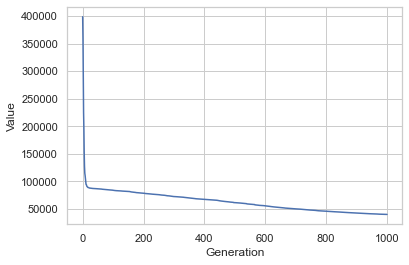

In [48]:
best=logbook.select("max")
gen=logbook.select("gen")

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, best, label="value")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Value")

labs = ['value', 'Average']

plt.show()

## Size = 200

In [57]:
ind_size = 200

MIN_VALUE, MAX_VALUE = -100., 100.
MIN_STRAT, MAX_STRAT = 0.0000001, 1. 

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='d', 
               fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

toolbox = base.Toolbox() 
toolbox.register("individual", init_univariate_es_ind, 
                 creator.Individual, 
                 creator.Strategy,
                 ind_size, 
                 MIN_VALUE, MAX_VALUE, 
                 MIN_STRAT, MAX_STRAT)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mutate", tools.mutESLogNormal, c=1, indpb=0.1)
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("evaluate", current_problem)
toolbox.register("select", tools.selBest)

ind = toolbox.individual()
pop = toolbox.population(n=2)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max, axis=0)
stats.register("min", np.min, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=2, 
                                         lambda_=2, cxpb=.6,
                                         mutpb=.3, ngen=1000, 
                                         stats=stats, 
                                         halloffame=hof,
                                         #verbose=False, 
                                         verbose=True
                                        )

gen	nevals	max              	min              
0  	2     	[711501.10222436]	[591350.07723546]
1  	2     	[591350.07723546]	[507837.78443846]
2  	2     	[483949.46489047]	[481260.20424698]
3  	2     	[461474.87740732]	[455282.88807605]
4  	2     	[455282.88807605]	[449371.64784643]
5  	2     	[449371.64784643]	[448533.39946986]
6  	2     	[448533.39946986]	[447218.22638039]
7  	2     	[447218.22638039]	[447042.79348219]
8  	2     	[447042.79348219]	[446687.61557538]
9  	2     	[446694.48805084]	[446687.61557538]
10 	2     	[446694.48805084]	[446687.61557538]
11 	2     	[446687.61557538]	[446673.7058149] 
12 	2     	[446673.7058149] 	[446662.07313327]
13 	2     	[446660.58519918]	[446623.91910937]
14 	1     	[446647.98786278]	[446623.91910937]
15 	2     	[446602.35763839]	[446468.85024558]
16 	2     	[446519.93784696]	[446468.85024558]
17 	2     	[446471.06857307]	[446468.85024558]
18 	2     	[446450.72241753]	[446438.6973665] 
19 	2     	[446441.9405378] 	[446438.6973665] 
20 	2     	[4

350	2     	[424019.40595864]	[423998.28470993]
351	2     	[424019.40595864]	[423998.28470993]
352	2     	[423998.28470993]	[423961.91501449]
353	2     	[423961.91501449]	[423943.5699494] 
354	1     	[423961.91501449]	[423943.5699494] 
355	1     	[423943.5699494] 	[423943.5699494] 
356	2     	[423943.5699494] 	[423943.5699494] 
357	1     	[423943.5699494] 	[423943.5699494] 
358	2     	[423943.5699494] 	[423730.73997242]
359	2     	[423792.56794286]	[423730.73997242]
360	2     	[423775.82296037]	[423730.73997242]
361	2     	[423751.39058977]	[423730.73997242]
362	1     	[423730.73997242]	[423711.09110415]
363	2     	[423714.34305028]	[423711.09110415]
364	2     	[423712.802048]  	[423711.09110415]
365	2     	[423711.09110415]	[423710.50282386]
366	2     	[423710.97617943]	[423710.50282386]
367	1     	[423710.84823671]	[423710.50282386]
368	2     	[423710.50282386]	[423684.44854184]
369	1     	[423684.44854184]	[423671.82017293]
370	2     	[423684.44854184]	[423671.82017293]
371	2     	[4

649	2     	[408437.02973061]	[408409.21172585]
650	2     	[408425.29351176]	[408409.21172585]
651	1     	[408409.21172585]	[408404.92488052]
652	2     	[408409.21172585]	[408404.92488052]
653	2     	[408404.92488052]	[408402.76406559]
654	2     	[408402.76406559]	[408402.34100052]
655	1     	[408402.76406559]	[408402.34100052]
656	2     	[408402.76406559]	[408402.34100052]
657	2     	[408402.2280927] 	[407894.85085117]
658	2     	[408187.59770604]	[407894.85085117]
659	2     	[408007.43970954]	[407894.85085117]
660	2     	[407925.35118456]	[407894.85085117]
661	2     	[407894.85085117]	[407885.3544019] 
662	2     	[407893.86448698]	[407885.3544019] 
663	2     	[407785.54173379]	[407241.68697321]
664	2     	[407241.68697321]	[406861.06533467]
665	1     	[406861.06533467]	[406830.91054647]
666	2     	[406830.91054647]	[406643.28673625]
667	2     	[406748.71121129]	[406643.28673625]
668	2     	[406643.28673625]	[406634.97100697]
669	1     	[406634.97100697]	[406163.68609492]
670	2     	[4

941	2     	[387844.0046565] 	[387758.00810085]
942	2     	[387786.16688155]	[387758.00810085]
943	2     	[387786.16688155]	[387758.00810085]
944	2     	[387760.19178543]	[387758.00810085]
945	1     	[387758.00810085]	[387758.00810085]
946	2     	[387758.00810085]	[387758.00810085]
947	2     	[387758.00810085]	[387758.00810085]
948	2     	[387758.00810085]	[387758.00810085]
949	2     	[387758.00810085]	[387758.00810085]
950	2     	[387758.00810085]	[387758.00810085]
951	2     	[387758.00810085]	[387225.79502824]
952	2     	[387358.4814985] 	[387225.79502824]
953	2     	[387238.11344105]	[387225.79502824]
954	2     	[387225.79502824]	[387220.34109023]
955	2     	[387220.34109023]	[387218.83754456]
956	1     	[387218.83754456]	[387218.83754456]
957	2     	[387218.83754456]	[387218.83754456]
958	2     	[387218.83754456]	[386696.99966907]
959	2     	[387096.67708572]	[386696.99966907]
960	2     	[386937.15944102]	[386696.99966907]
961	2     	[386696.99966907]	[386510.96367049]
962	1     	[3

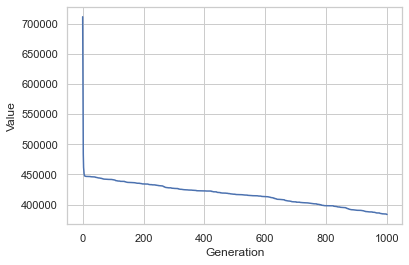

In [58]:
best=logbook.select("max")
gen=logbook.select("gen")

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, best, label="value")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Value")

labs = ['value', 'Average']

plt.show()

### Conclusões

Quanto maior o tamanho do individuo menor foi a proximidade da o resultado optimo, pois envolvendo uma maior quantidade de números a ser somados pela formula da Esfera, que envolve elevar os números ao quadrado, assim mesmo números negativos tem seu valor final positivo, maior a distancia de cada individuo de chegar no valor de Zero.

# Variando população

o  tamanho de inviduo usado para esse experimento será de 50

## Population = 20

In [59]:
ind_size = 50
n_pop=20
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='d', 
               fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

toolbox = base.Toolbox() 
toolbox.register("individual", init_univariate_es_ind, 
                 creator.Individual, 
                 creator.Strategy,
                 ind_size, 
                 MIN_VALUE, MAX_VALUE, 
                 MIN_STRAT, MAX_STRAT)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mutate", tools.mutESLogNormal, c=1, indpb=0.1)
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("evaluate", current_problem)
toolbox.register("select", tools.selBest)

ind = toolbox.individual()
pop = toolbox.population(n=n_pop)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max, axis=0)
stats.register("min", np.min, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=n_pop, 
                                         lambda_=n_pop, cxpb=.6,
                                         mutpb=.3, ngen=400, 
                                         stats=stats, 
                                         halloffame=hof,
                                         #verbose=False, 
                                         verbose=True
                                        )

gen	nevals	max              	min              
0  	20    	[217916.63168484]	[143825.69397349]
1  	20    	[155045.72607452]	[90367.34802336] 
2  	17    	[111823.32748466]	[80327.15659894] 
3  	19    	[90367.34802336] 	[57668.38061418] 
4  	20    	[74086.26408152] 	[42197.75796272] 
5  	19    	[54505.49467899] 	[37955.53825031] 
6  	18    	[49479.55749711] 	[30599.0350159]  
7  	18    	[42197.75796272] 	[30599.0350159]  
8  	18    	[37278.97861605] 	[26555.0267539]  
9  	20    	[33113.26165798] 	[26555.0267539]  
10 	18    	[30475.83558263] 	[24624.34313874] 
11 	18    	[26788.52537149] 	[20602.8524191]  
12 	18    	[24768.53144144] 	[20602.8524191]  
13 	20    	[22944.93041251] 	[20602.8524191]  
14 	18    	[21696.93711386] 	[20060.73359827] 
15 	19    	[20765.96589588] 	[19673.7036701]  
16 	17    	[20478.23335161] 	[19650.42826951] 
17 	20    	[20008.4364961]  	[18908.88973395] 
18 	18    	[19787.61060529] 	[18614.05165948] 
19 	17    	[19673.7036701]  	[18614.05165948] 
20 	17    	[1

273	17    	[11435.73962091] 	[11261.85733936] 
274	18    	[11403.96058394] 	[11261.85733936] 
275	19    	[11358.33063261] 	[11261.85733936] 
276	18    	[11328.57081545] 	[11242.78106703] 
277	19    	[11304.74312026] 	[11169.31297434] 
278	19    	[11288.45447423] 	[11066.17177311] 
279	18    	[11240.28656764] 	[11023.16285201] 
280	18    	[11209.94535234] 	[11023.16285201] 
281	19    	[11182.49380131] 	[10980.90726703] 
282	19    	[11155.90368941] 	[10975.16146812] 
283	16    	[11109.04750393] 	[10975.16146812] 
284	18    	[11073.07067511] 	[10975.16146812] 
285	17    	[11017.73758187] 	[10920.21913631] 
286	19    	[10997.86043278] 	[10920.21913631] 
287	19    	[10968.98012945] 	[10905.38435486] 
288	20    	[10941.24663702] 	[10870.18246842] 
289	19    	[10930.02088214] 	[10843.64648983] 
290	17    	[10914.32001041] 	[10843.64648983] 
291	19    	[10896.71429716] 	[10776.08899078] 
292	17    	[10872.39084615] 	[10746.1265293]  
293	20    	[10853.87652614] 	[10726.99159398] 
294	19    	[1

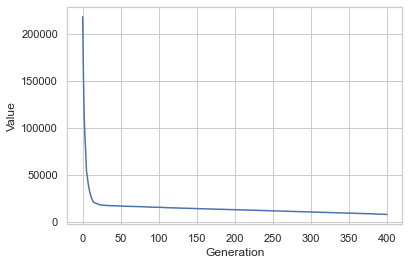

In [60]:
best=logbook.select("max")
gen=logbook.select("gen")

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, best, label="value")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Value")

labs = ['value', 'Average']

plt.show()

## Population = 50

In [61]:
ind_size = 50
n_pop=50
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='d', 
               fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

toolbox = base.Toolbox() 
toolbox.register("individual", init_univariate_es_ind, 
                 creator.Individual, 
                 creator.Strategy,
                 ind_size, 
                 MIN_VALUE, MAX_VALUE, 
                 MIN_STRAT, MAX_STRAT)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mutate", tools.mutESLogNormal, c=1, indpb=0.1)
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("evaluate", current_problem)
toolbox.register("select", tools.selBest)

ind = toolbox.individual()
pop = toolbox.population(n=n_pop)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max, axis=0)
stats.register("min", np.min, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=n_pop, 
                                         lambda_=n_pop, cxpb=.6,
                                         mutpb=.3, ngen=400, 
                                         stats=stats, 
                                         halloffame=hof,
                                         #verbose=False, 
                                         verbose=True
                                        )

gen	nevals	max              	min              
0  	50    	[201056.32576608]	[116945.93189272]
1  	42    	[154711.50454745]	[84711.83150162] 
2  	45    	[118575.73549103]	[66540.8419677]  
3  	47    	[89515.99980985] 	[53499.32078759] 
4  	43    	[74636.04373344] 	[37677.76123541] 
5  	48    	[58625.69665973] 	[35592.64950059] 
6  	43    	[47063.84477398] 	[27797.7813783]  
7  	44    	[37468.77786832] 	[22562.43536518] 
8  	42    	[30522.26894697] 	[17196.98351529] 
9  	44    	[26147.50672795] 	[14174.2370574]  
10 	42    	[21061.22691929] 	[13900.26345878] 
11 	45    	[17767.94352901] 	[11726.47778765] 
12 	45    	[15522.2237999]  	[10574.01628326] 
13 	47    	[13425.04370285] 	[9874.05749178]  
14 	46    	[11726.47778765] 	[8267.47598214]  
15 	44    	[10434.99254536] 	[8267.47598214]  
16 	45    	[9793.93381595]  	[7919.90936188]  
17 	46    	[8923.39795075]  	[7095.83763496]  
18 	46    	[8333.6859167]   	[7089.75657522]  
19 	43    	[7921.24210735]  	[6578.98466633]  
20 	47    	[7

211	45    	[2460.62376104]  	[2407.61993317]  
212	45    	[2449.76949104]  	[2399.25180695]  
213	45    	[2432.8581385]   	[2382.25459294]  
214	44    	[2416.50469631]  	[2364.50402252]  
215	42    	[2408.22409872]  	[2335.94706967]  
216	46    	[2395.64646288]  	[2335.94706967]  
217	44    	[2385.89347438]  	[2335.94706967]  
218	46    	[2370.02964026]  	[2309.85725518]  
219	49    	[2355.51705674]  	[2251.41449889]  
220	47    	[2342.58259582]  	[2242.92026507]  
221	43    	[2326.56887953]  	[2242.92026507]  
222	42    	[2300.71141333]  	[2236.87770584]  
223	43    	[2282.86693786]  	[2206.34302078]  
224	46    	[2261.37157265]  	[2202.23931725]  
225	46    	[2245.80598884]  	[2194.1224389]   
226	47    	[2233.21002904]  	[2170.60571084]  
227	47    	[2223.50767999]  	[2170.60571084]  
228	45    	[2211.73217619]  	[2161.10874458]  
229	42    	[2201.09089604]  	[2150.40485238]  
230	47    	[2192.75107346]  	[2150.40485238]  
231	45    	[2182.19277119]  	[2140.43589648]  
232	44    	[2

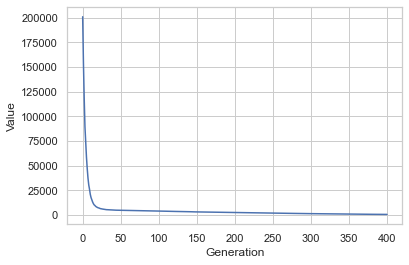

In [62]:
best=logbook.select("max")
gen=logbook.select("gen")

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, best, label="value")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Value")

labs = ['value', 'Average']

plt.show()